This is the background work and documentation of the "Language Recognition" project for CS3120. This serves mainly as an explanation as well as a document for me to look back on.
Special thanks to the following for collecting datasets used within this project.
- https://github.com/adbar/German-NLP/blob/master/README.md
- https://www.merlin-platform.eu/

This project looks at words in the German language and will give an estimate on fluency.

# Part 1: Dataset Preparation.
There are multiple datasets that will be used in this project. They are located in /TrainingData. They will each need to be extracted in order to get the appropriate information. 

In [11]:
import csv
import re
import os

def extract_metadata(text):
    # Define patterns for each metadata field
    patterns = {
        "Test language": r"Test language: (.+)",
        "CEFR level of test": r"CEFR level of test: (.+)",
        "Mother tongue": r"Mother tongue: (.+)",
        "Overall CEFR rating": r"Overall CEFR rating: (.+)",
        "Grammatical accuracy": r"Grammatical accuracy: (.+)",
        "Orthography": r"Orthography: (.+)",
        "Vocabulary range": r"Vocabulary range: (.+)",
        "Vocabulary control": r"Vocabulary control: (.+)",
        "Coherence/Cohesion": r"Coherence/Cohesion: (.+)",
        "Sociolinguistic appropriateness": r"Sociolinguistic appropriateness: (.+)",
        "Learner text": r"Learner text:\s+([\s\S]+?)$"  # Match all text after "Learner text:"
    }
    
    extracted_data = {}
    for key, pattern in patterns.items():
        match = re.search(pattern, text, re.MULTILINE)
        extracted_data[key] = match.group(1).strip() if match else ""
    return extracted_data

def process_folder(input_folder, output_file):
    # List all .txt files in the folder
    files = [f for f in os.listdir(input_folder) if f.endswith('.txt')]
    if not files:
        print("No .txt files found in the specified folder.")
        return

    # Process each file and collect data
    all_data = []
    for file in files:
        file_path = os.path.join(input_folder, file)
        with open(file_path, 'r', encoding='utf-8') as f:
            text = f.read()
        metadata = extract_metadata(text)
        metadata['Filename'] = file  # Add filename for reference
        all_data.append(metadata)
    
    # Write all data to a single CSV
    with open(output_file, mode='w', newline='', encoding='utf-8') as csvfile:
        fieldnames = list(all_data[0].keys())  # Use keys from the first entry
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(all_data)

    print(f"Data from {len(files)} files extracted and written to {output_file}")

def main():
    input_folder = "TrainingData"  # Containing .txt files
    output_file = "trainingParsed.csv"     # Desired output CSV file

    process_folder(input_folder, output_file)

if __name__ == "__main__":
    main()


Data from 1033 files extracted and written to trainingParsed.csv


In [12]:
import pandas as pd

df = pd.read_csv('trainingParsed.csv')
df.head()

,Test language,CEFR level of test,Mother tongue,Overall CEFR rating,Grammatical accuracy,Orthography,Vocabulary range,Vocabulary control,Coherence/Cohesion,Sociolinguistic appropriateness,Learner text,Filename
0,German,C1,Russian,B2,B2,C1,C1,C1,C1,B2,"Ich begrüße alle, der sich für das Thema „Länd...",1031_0001950.txt
1,German,A2,Russian,A2,B1,B2,B1,B1,B2,B2,"Sehr geehrt Frau Schmidt, ich bin ein paar Tag...",1091_0000062.txt
2,German,A2,not reported,B1,B1,B2,B1,B1,B1,B1,Liebe Julia,1091_0000002.txt
3,German,C1,Spanish,B2,B1,B2,B2,B2,B2,B2,"Meine Meinung nach ist sinnlos, auch in Auslan...",1031_0002083.txt
4,German,B1,Portuguese,A2,A2,B1,B1,A2,A2,A2,"Stadt X, 24.02.2012",1061_0120323.txt


In [13]:
df.describe()

,Test language,CEFR level of test,Mother tongue,Overall CEFR rating,Grammatical accuracy,Orthography,Vocabulary range,Vocabulary control,Coherence/Cohesion,Sociolinguistic appropriateness,Learner text,Filename
count,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033
unique,1,5,15,6,7,7,7,7,7,7,744,1033
top,German,B1,not reported,B1,B1,B2,B1,B1,B1,B2,"Lieber Jens,",1091_0000050.txt
freq,1033,210,275,331,352,338,349,321,356,347,20,1


## 1.1 Reading and understanding the data

In [14]:
import seaborn as sns
# sns.scatterplot(data=df, x='CEFR level of test', y='Overall CEFR rating') # No Correlation
# sns.scatterplot(data=df, x='Vocabulary range', y='Overall CEFR rating') # No Correlation


In [15]:
df.groupby('Overall CEFR rating').size()


Overall CEFR rating
A1     57
A2    306
B1    331
B2    293
C1     42
C2      4
dtype: int64

In [16]:
df.groupby('Mother tongue').size()

Mother tongue
Arabic           64
Chinese          10
Czech             8
English          46
French           39
German            5
Hungarian        43
Italian          23
Polish           96
Portuguese       31
Russian         143
Spanish          85
Turkish          59
not reported    275
other           106
dtype: int64

/tmp/ipykernel_3216/1551584462.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cefr_counts.index, y=cefr_counts.values, palette='viridis')


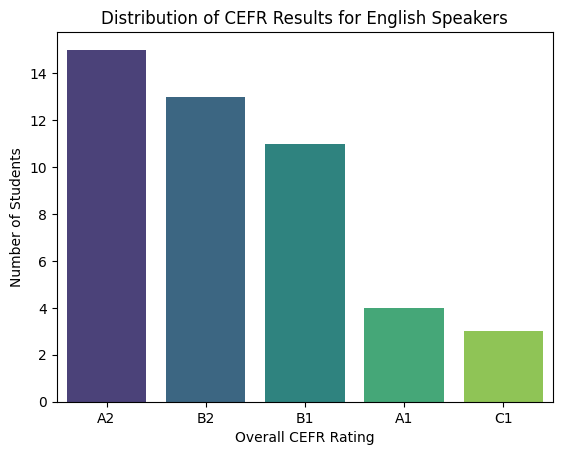

In [17]:
import matplotlib.pyplot as plt

# Filter for target language speakers to see if statistically relevant
english_speakers = df[df['Mother tongue'] == 'English']

# Count the distribution of CEFR results
cefr_counts = english_speakers['Overall CEFR rating'].value_counts()

# Create a bar plot
sns.barplot(x=cefr_counts.index, y=cefr_counts.values, palette='viridis')
plt.title('Distribution of CEFR Results for English Speakers')
plt.xlabel('Overall CEFR Rating')
plt.ylabel('Number of Students')
plt.show()

## 1.2 Data Cleaning
Cleaning relevant null values.

In [18]:
# Check for missing values in the entire dataframe
print(df.isnull().sum())

# Focus on the 'Learner text' column
print(df['Learner text'].isnull().sum())


Test language                      0
CEFR level of test                 0
Mother tongue                      0
Overall CEFR rating                0
Grammatical accuracy               0
Orthography                        0
Vocabulary range                   0
Vocabulary control                 0
Coherence/Cohesion                 0
Sociolinguistic appropriateness    0
Learner text                       0
Filename                           0
dtype: int64
0


In [19]:
# Check data types of all columns
print(df.dtypes)

# Filter non-string rows in 'Learner text' column
non_string_rows = df[~df['Learner text'].apply(lambda x: isinstance(x, str))]
print(non_string_rows)


Test language                      object
CEFR level of test                 object
Mother tongue                      object
Overall CEFR rating                object
Grammatical accuracy               object
Orthography                        object
Vocabulary range                   object
Vocabulary control                 object
Coherence/Cohesion                 object
Sociolinguistic appropriateness    object
Learner text                       object
Filename                           object
dtype: object
Empty DataFrame
Columns: [Test language, CEFR level of test, Mother tongue, Overall CEFR rating, Grammatical accuracy, Orthography, Vocabulary range, Vocabulary control, Coherence/Cohesion, Sociolinguistic appropriateness, Learner text, Filename]
Index: []


In [20]:
# Check for empty or whitespace-only strings
empty_text = df[df['Learner text'].str.strip() == '']
print("Empty text rows:")
print(empty_text)

# Check for unusually short strings (e.g., less than 3 characters)
short_text = df[df['Learner text'].str.len() < 3]
print("Short text rows:")
print(short_text)


Empty text rows:
Empty DataFrame
Columns: [Test language, CEFR level of test, Mother tongue, Overall CEFR rating, Grammatical accuracy, Orthography, Vocabulary range, Vocabulary control, Coherence/Cohesion, Sociolinguistic appropriateness, Learner text, Filename]
Index: []
Short text rows:
Empty DataFrame
Columns: [Test language, CEFR level of test, Mother tongue, Overall CEFR rating, Grammatical accuracy, Orthography, Vocabulary range, Vocabulary control, Coherence/Cohesion, Sociolinguistic appropriateness, Learner text, Filename]
Index: []


In [21]:
# Reload the file with a specific encoding
df = pd.read_csv('trainingParsed.csv', encoding='utf-8') 


# Part 2: Data Tuning

Pre-processing and Data Engineering the data.

This cleaning of data does the following:
- Convert text to lowercase to ensure uniformity during feature extraction.
- Remove special characters, numbers, and extra whitespace to clean up the input text. (re.sub)
- Break down the text into individual words or tokens using NLTK's word_tokenize.
- Remove commonly used words that don't carry significant meaning, such as "and," "is," "the."  NOTE: This may be altered for this list in particular after reading the data.
- Stemming & Lemming
- STEMMING: reduces words to their base or root form by chopping off suffixes (e.g., "running" → "run").
- LEMMING: returns the dictionary form of a word, considering its context and grammar (e.g., "better" → "good").

In [22]:
import spacy

# Load German model
nlp = spacy.load("de_core_news_sm")

# Process a sentence
doc = nlp("Das ist ein einfacher Satz.")
tokens = [token.text for token in doc if not token.is_stop]
print("Tokens:", tokens)


Tokens: ['einfacher', 'Satz', '.']


In [ ]:
import re

# Load SpaCy German language model
nlp = spacy.load("de_core_news_sm")

# Load DataFrame
df = pd.read_csv('trainingParsed.csv')

# Function for text cleaning
def clean_text(text, apply_stemming=False, apply_lemmatization=True):
    if not isinstance(text, str):
        return text 

    # Lowercase the text
    text = text.lower()

    # Remove special characters, numbers, and extra spaces
    text = re.sub(r'[^a-zäöüß\s]', '', text)  # Retain only letters and German-specific characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace

    # Process the text using SpaCy
    doc = nlp(text)

    # Tokenize, remove stopwords, and optionally lemmatize -- these come within SpaCy
    tokens = []
    for token in doc:
        if not token.is_stop:  # Remove stopwords
            if apply_lemmatization:
                tokens.append(token.lemma_)  # Use lemmatized form
            else:
                tokens.append(token.text)  # Use raw token text

    # Join tokens back into a single string
    return ' '.join(tokens)

# Add a new column for cleaned text
df['cleaned_text'] = df['Learner text'].apply(lambda x: clean_text(x, apply_stemming=False, apply_lemmatization=True))

# Preview the original and cleaned text
print(df[['Learner text', 'cleaned_text']].head())


                                        Learner text  \
0  Ich begrüße alle, der sich für das Thema „Länd...   
1  Sehr geehrt Frau Schmidt, ich bin ein paar Tag...   
2                                        Liebe Julia   
3  Meine Meinung nach ist sinnlos, auch in Auslan...   
4                                Stadt X, 24.02.2012   

                                        cleaned_text  
0  begrüßen Thema Land Tradition interessieren Me...  
1                      ehren Frau Schmidt paar Hause  
2                                        Liebe Julia  
3  Meinung sinnlos Ausland Tradition heimatland f...  
4                                            Stadt x  


# Part 3: Data Training and Testing

In [ ]:
# import libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [27]:
# Separate features (X) and labels (y)
X = df['cleaned_text']
y = df['Overall CEFR rating']  

In [28]:
# Chose this model "Bag Of Words" -> Naives Bayes in order to properly make this work.
# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Transform the text into a bag-of-words representation
X_bow = vectorizer.fit_transform(X)

# Check the resulting shape (rows: samples, columns: vocabulary size)
print(f"BoW Shape: {X_bow.shape}")


BoW Shape: (1033, 1731)


In [29]:
# splitting training and testing
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)


In [30]:
# Training the model
# Initialize the Naive Bayes classifier
model = MultinomialNB()

# Train the model on the training data
model.fit(X_train, y_train)


MultinomialNB()

In [31]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.46859903381642515
Classification Report:
               precision    recall  f1-score   support

          A1       0.00      0.00      0.00        11
          A2       0.50      0.45      0.48        55
          B1       0.43      0.72      0.54        68
          B2       0.56      0.35      0.43        63
          C1       0.33      0.11      0.17         9
          C2       0.00      0.00      0.00         1

    accuracy                           0.47       207
   macro avg       0.30      0.27      0.27       207
weighted avg       0.46      0.47      0.44       207



/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


This does not look good, so I will be adjusting the data below.

In [32]:
vectorizer = CountVectorizer(max_features=5000, ngram_range=(1, 2), stop_words=None)
X_bow = vectorizer.fit_transform(X)


In [33]:
model = MultinomialNB(alpha=0.1)
model.fit(X_train, y_train)


MultinomialNB(alpha=0.1)

In [34]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_bow, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.43478261 0.37198068 0.42995169 0.39320388 0.40291262]
Mean CV Accuracy: 0.406566296139956


/home/vscode/.local/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


## 3.1 - Improving accuracy
The model does not work very well as it is now. Even with Bag of Words and different test sizes, it still has a lower accuracy rate. Therefore, I think the issue lies more in line with the cleaned_text

In [35]:
# The code above might have been too intense in its cleaning. I will be using a slightly dumbed-down version.
# For later iterations, I would like to use more text / larger forms of German text in order to 


# Load SpaCy German language model
nlp = spacy.load("de_core_news_sm")

# Load DataFrame
df = pd.read_csv('trainingParsed.csv')

# Function for text cleaning
def clean_text(text, apply_stemming=False, apply_lemmatization=False):
    if not isinstance(text, str):
        return text 

    # Lowercase the text
    text = text.lower()

    # Remove special characters, numbers, and extra spaces
    text = re.sub(r'[^a-zäöüß\s]', '', text)  # Retain only letters and German-specific characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace

    # Process the text using SpaCy
    doc = nlp(text)

    # Tokenize, remove stopwords, and optionally lemmatize -- these come within SpaCy
    tokens = []
    for token in doc:
        if not token.is_stop:  # Remove stopwords
            if apply_lemmatization:
                tokens.append(token.lemma_)  # Use lemmatized form
            else:
                tokens.append(token.text)  # Use raw token text

    # Join tokens back into a single string
    return ' '.join(tokens)

# Add a new column for cleaned text
df['cleaned_text_2'] = df['Learner text'].apply(lambda x: clean_text(x, apply_stemming=False, apply_lemmatization=True))

# Preview the original and cleaned text
print(df[['Learner text', 'cleaned_text_2']].head())


                                        Learner text  \
0  Ich begrüße alle, der sich für das Thema „Länd...   
1  Sehr geehrt Frau Schmidt, ich bin ein paar Tag...   
2                                        Liebe Julia   
3  Meine Meinung nach ist sinnlos, auch in Auslan...   
4                                Stadt X, 24.02.2012   

                                      cleaned_text_2  
0  begrüßen Thema Land Tradition interessieren Me...  
1                      ehren Frau Schmidt paar Hause  
2                                        Liebe Julia  
3  Meinung sinnlos Ausland Tradition heimatland f...  
4                                            Stadt x  


In [37]:
# Separate features (X) and labels (y)
X = df['cleaned_text_2']
y = df['Overall CEFR rating']  

# splitting training and testing
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

In [38]:
# Training the model
# Initialize the Naive Bayes classifier
model = MultinomialNB()

# Train the model on the training data
model.fit(X_train, y_train)

MultinomialNB()

In [39]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.46859903381642515
Classification Report:
               precision    recall  f1-score   support

          A1       0.00      0.00      0.00        11
          A2       0.51      0.47      0.49        55
          B1       0.43      0.68      0.53        68
          B2       0.57      0.38      0.46        63
          C1       0.12      0.11      0.12         9
          C2       0.00      0.00      0.00         1

    accuracy                           0.47       207
   macro avg       0.27      0.27      0.27       207
weighted avg       0.46      0.47      0.45       207



/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


There is significant room for improvement within this. This means a different approach is necessary.

## 3.2 Changing the model
Upon further research, it appears that TF-IDF (Term Frequency-Inverse Document Frequency) is a more sophisticated version of BoW. This required looking into youtube videos and online lectures, but will hopefully help with accuracy.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
# ** This code was generated using ChatGPT ** 
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,  # Limit to 5000 most important features
    ngram_range=(1, 2),  # Include unigrams and bigrams
    stop_words=None      # Stopword removal already handled in preprocessing
)

# Transform cleaned text to TF-IDF representation
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text_2'])

# Check the shape of the resulting TF-IDF matrix
print(f"TF-IDF Shape: {X_tfidf.shape}")  # Rows: samples, Columns: features


TF-IDF Shape: (1033, 5000)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['Overall CEFR rating'], test_size=0.2, random_state=42)

print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")


Train Shape: (826, 5000), Test Shape: (207, 5000)


In [44]:
# Attempting Logistic Regression with this!

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.47342995169082125
Classification Report:
               precision    recall  f1-score   support

          A1       0.30      0.27      0.29        11
          A2       0.64      0.33      0.43        55
          B1       0.48      0.49      0.48        68
          B2       0.52      0.67      0.58        63
          C1       0.14      0.22      0.17         9
          C2       0.00      0.00      0.00         1

    accuracy                           0.47       207
   macro avg       0.35      0.33      0.33       207
weighted avg       0.51      0.47      0.47       207



This is not much better. :(

## Part 4: Models and Weights.
For transparency's sake, this section was largely thanks to answers on Stack Overflow, as well as contacts in real life. Some code will be noted as generated by ChatGPT, and credited accordingly.

The accuracy is not to my liking, and will now be weighting the data further in order to try to rectify this.
Additional ways to fix this would be to add more data that could be found either in Goethe's website (though this would be time consuming) or through training programs for those learning German.

In [63]:
# Balancing the model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
from collections import Counter
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Part of this code (namely, the weights) were started with ChatGPT and modified for this.

# Convert CEFR labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['Overall CEFR rating'])

# Print the mapping of classes to labels
print("Label Mapping:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{class_name} -> {i}")

# 1. Split the data (make sure to use the encoded labels)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# 2. Calculate class weights based on y_train (not y_encoded directly)
class_counts = Counter(y_train)  # Counter using y_train
total_samples = len(y_train)
num_classes = len(class_counts)
class_weights = {cls: total_samples / (num_classes * count) for cls, count in class_counts.items()}

# Print class weights
print("Class Weights:", class_weights)

# 3. Map weights to each sample in the training set based on y_train
weights = [class_weights[label] for label in y_train]  # Map weights to each sample based on y_train

# 4. Initialize XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 5. Train the XGBoost model with the sample weights
xgb.fit(X_train, y_train, sample_weight=weights)

# 6. Make predictions (optional)
y_pred_xgb = xgb.predict(X_test)

# Optionally, decode predictions back to original labels
y_pred_decoded = label_encoder.inverse_transform(y_pred_xgb)

# Optionally, evaluate the model
from sklearn.metrics import classification_report
# Evaluate the model with the numeric labels (no need to decode y_test)
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

# If you still want to decode the predictions to the original labels, you can print them separately
y_pred_decoded = label_encoder.inverse_transform(y_pred_xgb)
print("Decoded Predictions:\n", y_pred_decoded)


Label Mapping:
A1 -> 0
A2 -> 1
B1 -> 2
B2 -> 3
C1 -> 4
C2 -> 5
Class Weights: {np.int64(2): 0.523447401774398, np.int64(1): 0.548472775564409, np.int64(3): 0.5985507246376811, np.int64(0): 2.9927536231884058, np.int64(4): 4.171717171717172, np.int64(5): 45.888888888888886}


/home/vscode/.local/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [22:58:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.18      0.20        11
           1       0.49      0.40      0.44        55
           2       0.42      0.49      0.45        68
           3       0.57      0.51      0.54        63
           4       0.21      0.33      0.26         9
           5       0.00      0.00      0.00         1

    accuracy                           0.44       207
   macro avg       0.32      0.32      0.31       207
weighted avg       0.46      0.44      0.45       207

Decoded Predictions:
 ['C1' 'A2' 'B1' 'B2' 'C1' 'B1' 'B2' 'C2' 'B1' 'B2' 'B1' 'B1' 'A2' 'C1'
 'B1' 'A1' 'C1' 'A1' 'B2' 'B2' 'A2' 'B1' 'A2' 'B1' 'A2' 'B2' 'A2' 'B1'
 'B1' 'B2' 'A2' 'B1' 'A2' 'B1' 'B2' 'A2' 'A1' 'B1' 'A2' 'B1' 'B1' 'B2'
 'C1' 'B2' 'B2' 'B2' 'B2' 'A2' 'A2' 'B1' 'A2' 'B2' 'B1' 'A2' 'B1' 'B2'
 'B1' 'B1' 'B1' 'B2' 'C1' 'B1' 'B1' 'B2' 'B1' 'A2' 'B2' 'C1' 'B2' 'B1'
 'A1' 'C1' 'B1' 'B2' 'A2' 'B2' 'A2' 'A1' 'B1' 'A2' 'A2' 